In [41]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
lbc = load_breast_cancer()

In [60]:
print(lbc.target_names)
print(lbc.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [68]:
df = pd.DataFrame(lbc.data, columns = lbc.feature_names)

In [69]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [34]:
Y = pd.DataFrame(lbc.target)
print(Y)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
564  0
565  0
566  0
567  0
568  1

[569 rows x 1 columns]


In [80]:
X = df[['mean radius', 'mean concave points']]
print(X.head())

   mean radius  mean concave points
0        17.99              0.14710
1        20.57              0.07017
2        19.69              0.12790
3        11.42              0.10520
4        20.29              0.10430


In [81]:
print(Y.shape)
print(X.shape)

(569, 1)
(569, 2)


In [83]:
ss = StandardScaler()
X_new = ss.fit_transform(X)
print(X_new)

[[ 1.09706398  2.53247522]
 [ 1.82982061  0.54814416]
 [ 1.57988811  2.03723076]
 ...
 [ 0.70228425  0.10577736]
 [ 1.83834103  2.65886573]
 [-1.80840125 -1.26181958]]


In [84]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, random_state=0)

In [85]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier().fit(x_train, y_train)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
y_test1 = dc.predict(x_test)
print("accuracy_score: ",accuracy_score(y_test1, y_test))
print("confusion matrix: ")
print(confusion_matrix(y_test1, y_test))
print("precision score: ",precision_score(y_test1, y_test))
print("recall score: ",recall_score(y_test1, y_test))

accuracy_score:  0.8881118881118881
confusion matrix: 
[[46  9]
 [ 7 81]]
precision score:  0.9
recall score:  0.9204545454545454


[Text(0.6109375, 0.9615384615384616, 'X[1] <= 0.0\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.371875, 0.8846153846153846, 'X[0] <= 0.242\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.21875, 0.8076923076923077, 'X[1] <= -0.109\ngini = 0.055\nsamples = 248\nvalue = [7, 241]'),
 Text(0.1125, 0.7307692307692307, 'X[1] <= -0.571\ngini = 0.041\nsamples = 239\nvalue = [5, 234]'),
 Text(0.05, 0.6538461538461539, 'X[0] <= -0.215\ngini = 0.012\nsamples = 161\nvalue = [1, 160]'),
 Text(0.025, 0.5769230769230769, 'gini = 0.0\nsamples = 135\nvalue = [0, 135]'),
 Text(0.075, 0.5769230769230769, 'X[0] <= -0.192\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.05, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.175, 0.6538461538461539, 'X[1] <= -0.561\ngini = 0.097\nsamples = 78\nvalue = [4, 74]'),
 Text(0.15, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.5769230769

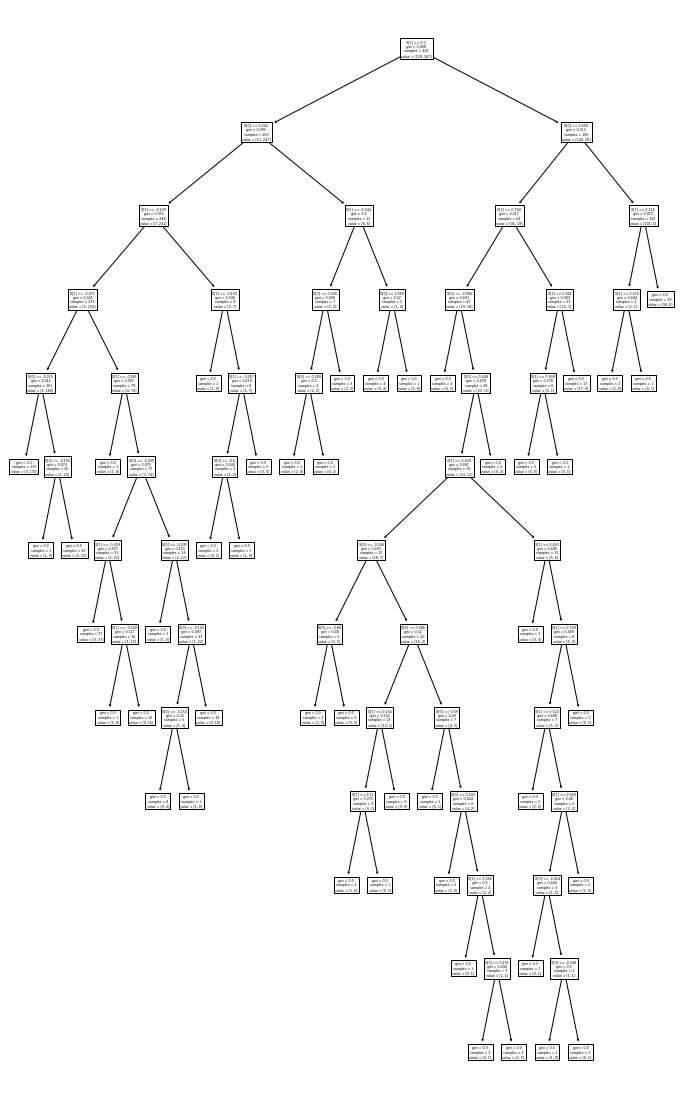

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (12,20))
plot_tree(dc)